Posttest 7<br>
Nama : Aghnia Nurhidayah <br>
NIM : 2209106020 <br>
Kelas : A1 22


link gdrive dataset https://drive.google.com/file/d/1CAn-A8tO1kb-6nKuzCQQdZAS9Ty1tIW7/view?usp=drive_link

Import Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengeluarkan folder yang ada pada file zip data_images

In [2]:
!unzip "/content/drive/MyDrive/dataset_images.zip"

Archive:  /content/drive/MyDrive/dataset_images.zip
   creating: dataset_images/cheetah/
  inflating: dataset_images/cheetah/00000000_224resized.png  
  inflating: dataset_images/cheetah/00000001_224resized.png  
  inflating: dataset_images/cheetah/00000002_224resized.png  
  inflating: dataset_images/cheetah/00000003_224resized.png  
  inflating: dataset_images/cheetah/00000004_224resized.png  
  inflating: dataset_images/cheetah/00000005_224resized.png  
  inflating: dataset_images/cheetah/00000007_224resized.png  
  inflating: dataset_images/cheetah/00000008_224resized.png  
  inflating: dataset_images/cheetah/00000009_224resized.png  
  inflating: dataset_images/cheetah/00000010_224resized.png  
  inflating: dataset_images/cheetah/00000011_224resized.png  
  inflating: dataset_images/cheetah/00000012_224resized.png  
  inflating: dataset_images/cheetah/00000014_224resized.png  
  inflating: dataset_images/cheetah/00000015_224resized.png  
  inflating: dataset_images/cheetah/0000001

Cek file gambar yang corrupt

In [3]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/dataset_images").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

/content/dataset_images/hyena/00000224_224resized.png
/content/dataset_images/cheetah/00000244_224resized.png


Menghapus file gambar yang corrupt

In [4]:
!rm "/content/dataset_images/hyena/00000224_224resized.png"
!rm "/content/dataset_images/cheetah/00000244_224resized.png"

In [5]:
!pip install split-folders

In [6]:
import splitfolders

Split dataset dengan rasio 80% train, 10% test, dan 10% val

In [7]:
splitfolders.ratio("dataset_images",
                   output="dataset_final",
                   seed=1337,
                   ratio=(.8, .1, .1))

Copying files: 1723 files [00:00, 3309.78 files/s]


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Membuat variasi data gambar dengan Image Data Generator

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    brightness_range=[0.9, 1.1],
    vertical_flip=False,
    horizontal_flip=True,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1/255
)

Ambil dataset train dan val yang telah dibuat

In [10]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1377 images belonging to 6 classes.
Found 170 images belonging to 6 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Membuat model Sequential

In [12]:
model = Sequential([
    Conv2D(16,(3,3), activation = 'relu', input_shape = (224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(6, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Latih model

In [13]:
mf = model.fit(train_generator, epochs=15,
          validation_data=val_generator,
          verbose=1)

Epoch 1/15
15/44 [=========>....................] - ETA: 1:08 - loss: 1.8255 - accuracy: 0.1708

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


44/44 [==============================] - 98s 2s/step - loss: 1.7596 - accuracy: 0.2360 - val_loss: 1.6772 - val_accuracy: 0.2471
Epoch 2/15
44/44 [==============================] - 96s 2s/step - loss: 1.6180 - accuracy: 0.3268 - val_loss: 1.6908 - val_accuracy: 0.3000
Epoch 3/15
44/44 [==============================] - 99s 2s/step - loss: 1.4667 - accuracy: 0.3994 - val_loss: 1.3712 - val_accuracy: 0.4176
Epoch 4/15
44/44 [==============================] - 96s 2s/step - loss: 1.4094 - accuracy: 0.4256 - val_loss: 1.4981 - val_accuracy: 0.4118
Epoch 5/15
44/44 [==============================] - 95s 2s/step - loss: 1.3732 - accuracy: 0.4452 - val_loss: 1.2293 - val_accuracy: 0.5471
Epoch 6/15
44/44 [==============================] - 96s 2s/step - loss: 1.3814 - accuracy: 0.4662 - val_loss: 1.2154 - val_accuracy: 0.6000
Epoch 7/15
44/44 [==============================] - 105s 2s/step - loss: 1.2792 - accuracy: 0.5084 - val_loss: 1.2503 - val_accuracy: 0.5529
Epoch 8/15
44/44 [============

In [14]:
test_datagen = ImageDataGenerator(
    rescale=1/255.0
)

test_generator = test_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 176 images belonging to 6 classes.


In [15]:
model.evaluate(test_generator)

6/6 [==============================] - 3s 426ms/step - loss: 1.3593 - accuracy: 0.5795


[1.3593032360076904, 0.5795454382896423]

In [16]:
import matplotlib.pyplot as plt

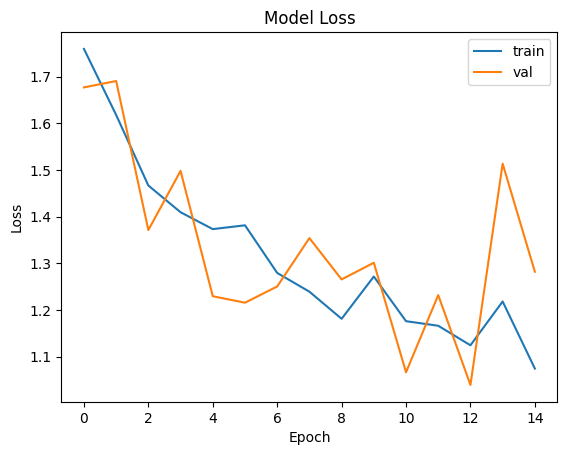

In [17]:
plt.plot(mf.history['loss'], label='train')
plt.plot(mf.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

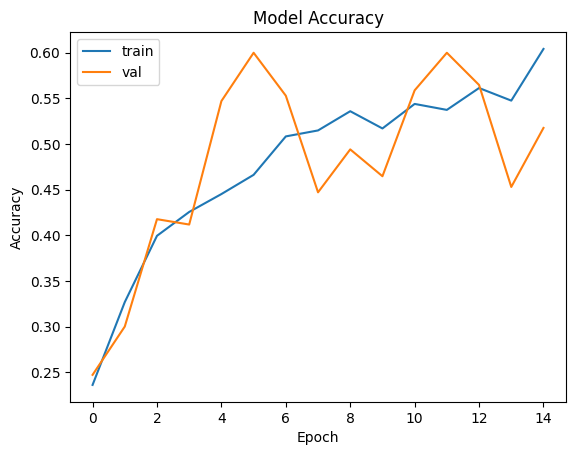

In [19]:
plt.plot(mf.history['accuracy'], label='train')
plt.plot(mf.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()